In [1]:
import scanpy as sc

In [2]:
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/h5as_files/adata_neu.h5ad")  # Replace with your data file

In [3]:
#PCA
sc.tl.pca(adata, svd_solver="arpack")

In [4]:
#Neighborhood Graph Construction:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


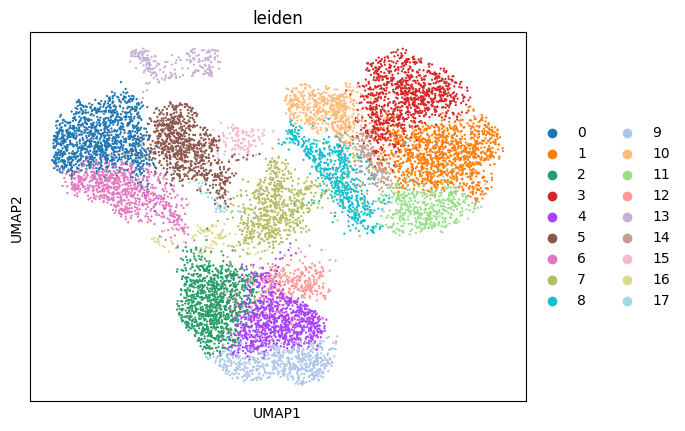

In [5]:
# UMAP
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"], save="_preprocessing.png")

DEGs für jedes Cluster ausgeben lassen

DEGs for Cluster 13: ('ENSG00000101384', 'ENSG00000156113', 'ENSG00000135245', 'ENSG00000171848', 'ENSG00000164442', 'ENSG00000167552', 'ENSG00000176973', 'ENSG00000123975', 'ENSG00000124171', 'ENSG00000150995', 'ENSG00000137804', 'ENSG00000125148', 'ENSG00000197930', 'ENSG00000130449', 'ENSG00000123975', 'ENSG00000117632', 'ENSG00000249992', 'ENSG00000167900')


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


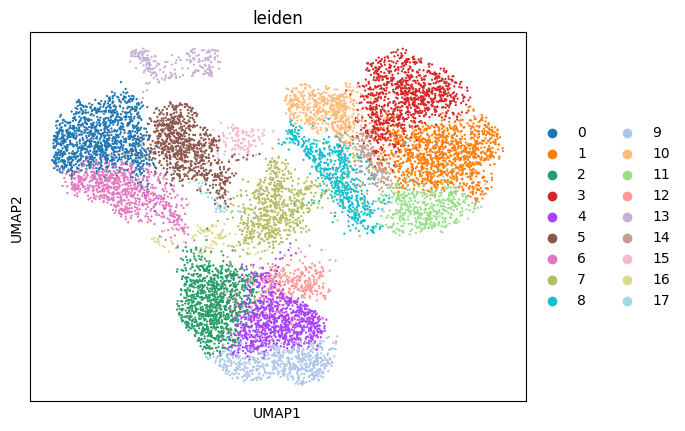

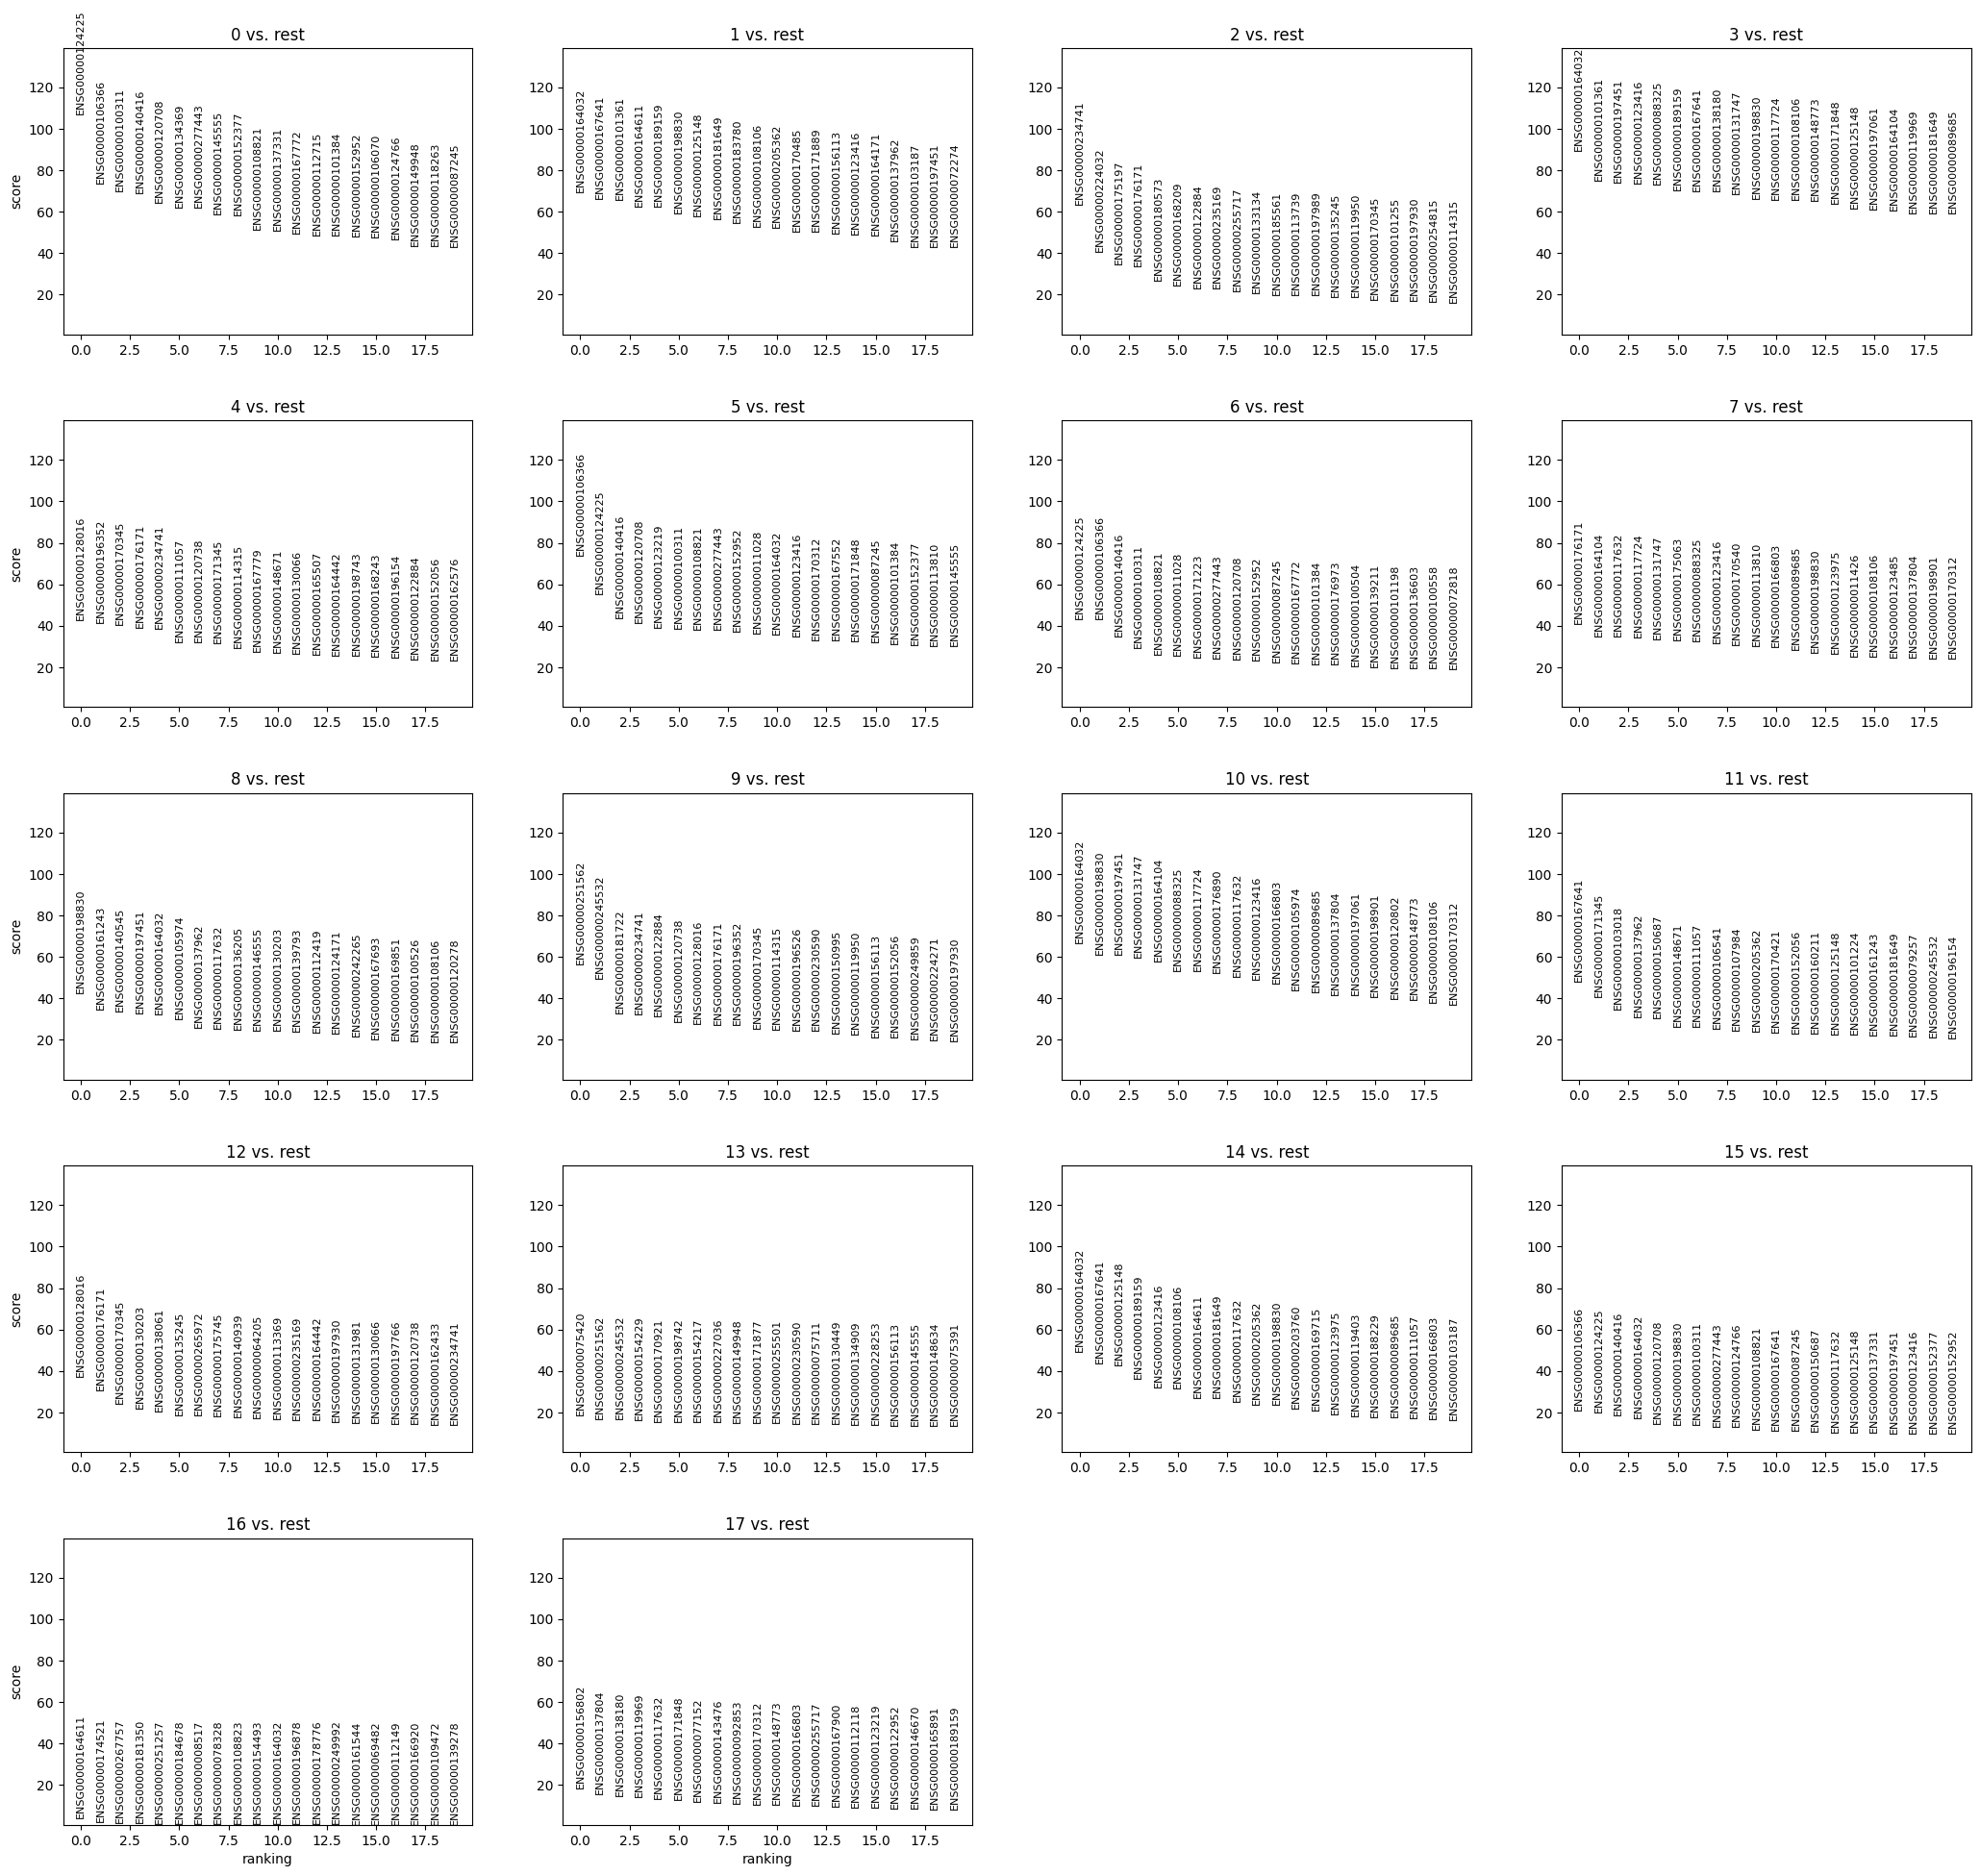

In [31]:
import scanpy as sc
import matplotlib.pyplot as plt

# Annahme: adata ist Ihr anndata-Objekt

# Berechnen von UMAP und Leiden-Clustering
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Berechnen der differentiell exprimierten Gene für jedes Cluster
sc.tl.rank_genes_groups(adata, "leiden", method='t-test', key_added="rank_genes_leiden")

# Hier definieren Sie den gewünschten Cluster-Index, z.B. 0 für den ersten Cluster
cluster_index = 13

# Die differentiell exprimierten Gene für das ausgewählte Cluster abrufen
de_genes = adata.uns["rank_genes_leiden"]["names"][cluster_index]

# Drucken Sie die Liste der differentiell exprimierten Gene aus
print(f"DEGs for Cluster {cluster_index}: {de_genes}")

# Plot von UMAP mit Farbcodierung nach Leiden-Clustern und speichern
sc.pl.umap(adata, color=["leiden"], save="_preprocessing.png")

# Plot von differentiell exprimierten Genen für das ausgewählte Cluster
sc.pl.rank_genes_groups(adata, groupby="leiden", key="rank_genes_leiden", group=cluster_index, save=f"_cluster_{cluster_index}_DEGs.png")

# Zeigen Sie die Plots an
plt.show()


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


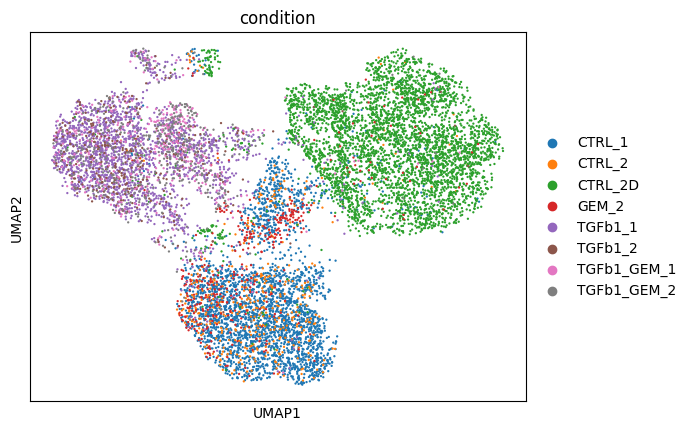

In [6]:
# UMAP
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["condition"], save="_preprocessing.png")

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/tools/_umap.py:165: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


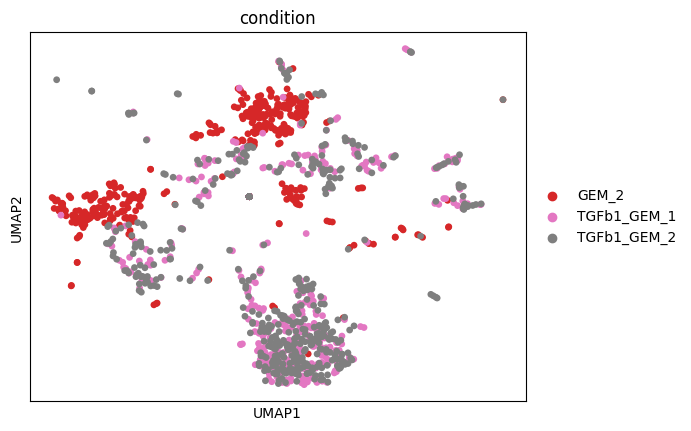

In [23]:
import scanpy as sc

# Annahme: adata enthält deine Daten und wurde bereits geladen/verarbeitet

# Liste der gewünschten Bedingungen
#selected_conditions = ["CTRL_1", 'CTRL_2',"CTRL_2D"]  # Füge hier die Bedingungen hinzu, die du anzeigen möchtest
#selected_conditions = ["CTRL_1", 'CTRL_2',"GEM_2"] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_1",'TGFb1_2'] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"GEM_2"]
selected_conditions = ["TGFb1_GEM_1",'TGFb1_GEM_2',"GEM_2"]


# Filtere die Daten nach den ausgewählten Bedingungen
adata_selected = adata[adata.obs["condition"].isin(selected_conditions)]

# Führe UMAP-Berechnungen durch
sc.tl.umap(adata_selected)

# Führe Leiden-Clustering durch
sc.tl.leiden(adata_selected)

# Erstelle die UMAP-Plot und speichere ihn als Bild
sc.pl.umap(adata_selected, color=["condition"], save="_preprocessing.png")

In [24]:
import os
import scanpy as sc
import matplotlib.pyplot as plt

# Speicherpfad für das Plot-Bild
output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/Figures'
output_filename = os.path.join(output_folder, 'TGFb1_2_GEM_1_2vsGEM_2_umap_plot_preprocessing.png')

# Überprüfen, ob der Ausgabeordner vorhanden ist, andernfalls erstellen
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Speichern des Plots im angegebenen Ordner
plt.savefig(output_filename, dpi=600)

<Figure size 640x480 with 0 Axes>